- imports

In [1]:
import pandas as pd
import random
import time
import os
import imp
import cv2
import pickle
import shutil
import numpy as np
from utils import OD_Assemble
import tensorflow as tf
from tqdm import tqdm
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from tensorflow.keras.preprocessing.image import img_to_array,load_img

# optional
# from google.colab.patches import cv2_imshow
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline


# Enable GPU dynamic memory allocation (do not use this for colab)
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus:
#     tf.config.experimental.set_memory_growth(gpu, True)


In [2]:
tf.__version__

'2.5.0'

- required files

In [2]:
df = pd.read_csv('../annotations/csvs/uncropped_res_capped_balanced/test.csv')
PATH_TO_LABELS = "../annotations/label_map.pbtxt"
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,use_display_name=True)

# MODEL_LIST = ['faster_rcnn_resnet101_v1_640x640_BBOX.pkl','ssd_resnet152_v1_fpn_640x640.pkl','centernet_resnet101_v1_512x512_BBOX.pkl']
MODEL_LIST = os.listdir('../annotations/ensemble_outputs/single_model_preds')
predictions_dict = {}
for i in range(len(MODEL_LIST)):
    with open('../annotations/ensemble_outputs/single_model_preds/'+MODEL_LIST[i], 'rb') as f:
        predictions_dict[i] = pickle.load(f)

## WBF implementation

- helper functions

In [3]:
# inference = combine.Wfb(location=0,operator=2,visualize=1)
# Image.fromarray(inference)
# combine  = OD_Assemble.Combiner([loaded_model_1,loaded_model_2,loaded_model_3],category_index,con_thresh=0.5)
# %load_ext line_profiler

# imp.reload(OD_Assemble)
# combine = OD_Assemble.NCombiner(indexes=[0,1,2],con_thresh=0.001,iou_thresh=0.55)
def calculations():
    # nm,aa,ab,ac,status = list(),list(),list(),list(),list( )
    # for i in tqdm(range(df.shape[0])):
    results = list()
    for i in tqdm(range(df.shape[0])):
        d = df.iloc[i]
        fname,bboxes,scores,classes = combine.Wfb(location=i,operator=2,visualize=0)
        if scores:
            max_index = scores.index(max(scores))
            a,b,c = bboxes[max_index],scores[max_index],classes[max_index]
            results.append([fname,*a,b,c])
        # if c:nm.extend([d['filename'] for _ in range(len(c))]),aa.extend(a),ab.extend(b),ac.extend(c),status.extend([1 for _ in range(len(c))])
        # else:nm.append(d['filename']),aa.extend([[0]*4]),ab.append(0),ac.append(0),status.append(0)
    return pd.pandas.DataFrame(results,columns=['filename','xmin','ymin','xmax','ymax','score','class'])

# imp.reload(OD_Assemble)
# combine = OD_Assemble.NCombiner(indexes=[0,1,2],con_thresh=0.4,iou_thresh=0.55)
def calculations2():
    # nm,aa,ab,ac,status = list(),list(),list(),list(),list( )
    # for i in tqdm(range(df.shape[0])):
    results = list()
    for i in tqdm(range(df.shape[0])):
        # d = df.iloc[i]
        fname,bboxes,scores,classes = combine.Wfb(location=i,operator=2,visualize=0)
        if scores:
            for j in range(len(scores)):
                results.append([fname,*bboxes[j],scores[j],classes[j],1])
        else:
            results.append([fname,*[0]*6,0])
                
            #     a,b,c = bboxes[j],scores[j],classes[j]
            #     results.append([fname,*a,b,c])
            # max_index = scores.index(max(scores))
            # a,b,c = bboxes[max_index],scores[max_index],classes[max_index]
            # results.append([fname,*a,b,c])
        # if c:nm.extend([d['filename'] for _ in range(len(c))]),aa.extend(a),ab.extend(b),ac.extend(c),status.extend([1 for _ in range(len(c))])
        # else:nm.append(d['filename']),aa.extend([[0]*4]),ab.append(0),ac.append(0),status.append(0)
    return pd.pandas.DataFrame(results,columns=['filename','xmin','ymin','xmax','ymax','score','class','status'])

In [37]:
MODEL_LIST

['centernet_resnet101_v1_512x512_BBOX.pkl',
 'faster_rcnn_inception_resnet_v2_640x640_BBOX.pkl',
 'faster_rcnn_resnet101_v1_1024x1024_BBOX.pkl',
 'faster_rcnn_resnet101_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_800x1333_BBOX.pkl',
 'faster_rcnn_resnet50_v1_640x640_BBOX.pkl',
 'ssd_resnet152_v1_fpn_640x640.pkl']

In [38]:
imp.reload(OD_Assemble)
combine = OD_Assemble.NCombiner(indexes=[1,2,3,5],con_thresh=0.5,iou_thresh=0.55)
res = calculations2()
res

100%|██████████| 15600/15600 [07:02<00:00, 36.92it/s] 


filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.260381  0.237529   
1               img/Button-Front_Blazer/img_00000093.jpg  0.247602  0.231210   
2        img/Open-Front_Zippered_Blazer/img_00000068.jpg  0.277298  0.282781   
3      img/Faux_Snakeskin-Trimmed_Blazer/img_00000051...  0.288686  0.226535   
4      img/Classic_Single-Button_Blazer/img_00000001.jpg  0.149226  0.378174   
...                                                  ...       ...       ...   
28707  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.227481  0.262105   
28708        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.202155  0.127887   
28709        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.188904  0.136474   
28710        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.184951  0.136812   
28711        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  
0      0.866639  0.791125  0.941986      5       1  
1      0.853300  0.763998  0.951809      1       1  
2      0.905679  0.757544  0.821076      5       1  
3      0.804698  0.776780  0.911755      5       1  
4      0.505773  0.648620  0.912519      1       1  
...         ...       ...       ...    ...     ...  
28707  0.809924  0.709248  0.950856     11       1  
28708  0.915820  0.916768  0.625821      2       1  
28709  0.910733  0.902868  0.529470      3       1  
28710  0.918102  0.893778  0.545615      5       1  
28711  0.897782  0.908442  0.969952     13       1  

[28712 rows x 8 columns]

In [6]:
res.status.value_counts()

1    29889
0       51
Name: status, dtype: int64

In [39]:
res.status.value_counts()

1    28627
0       85
Name: status, dtype: int64

- Checking the results

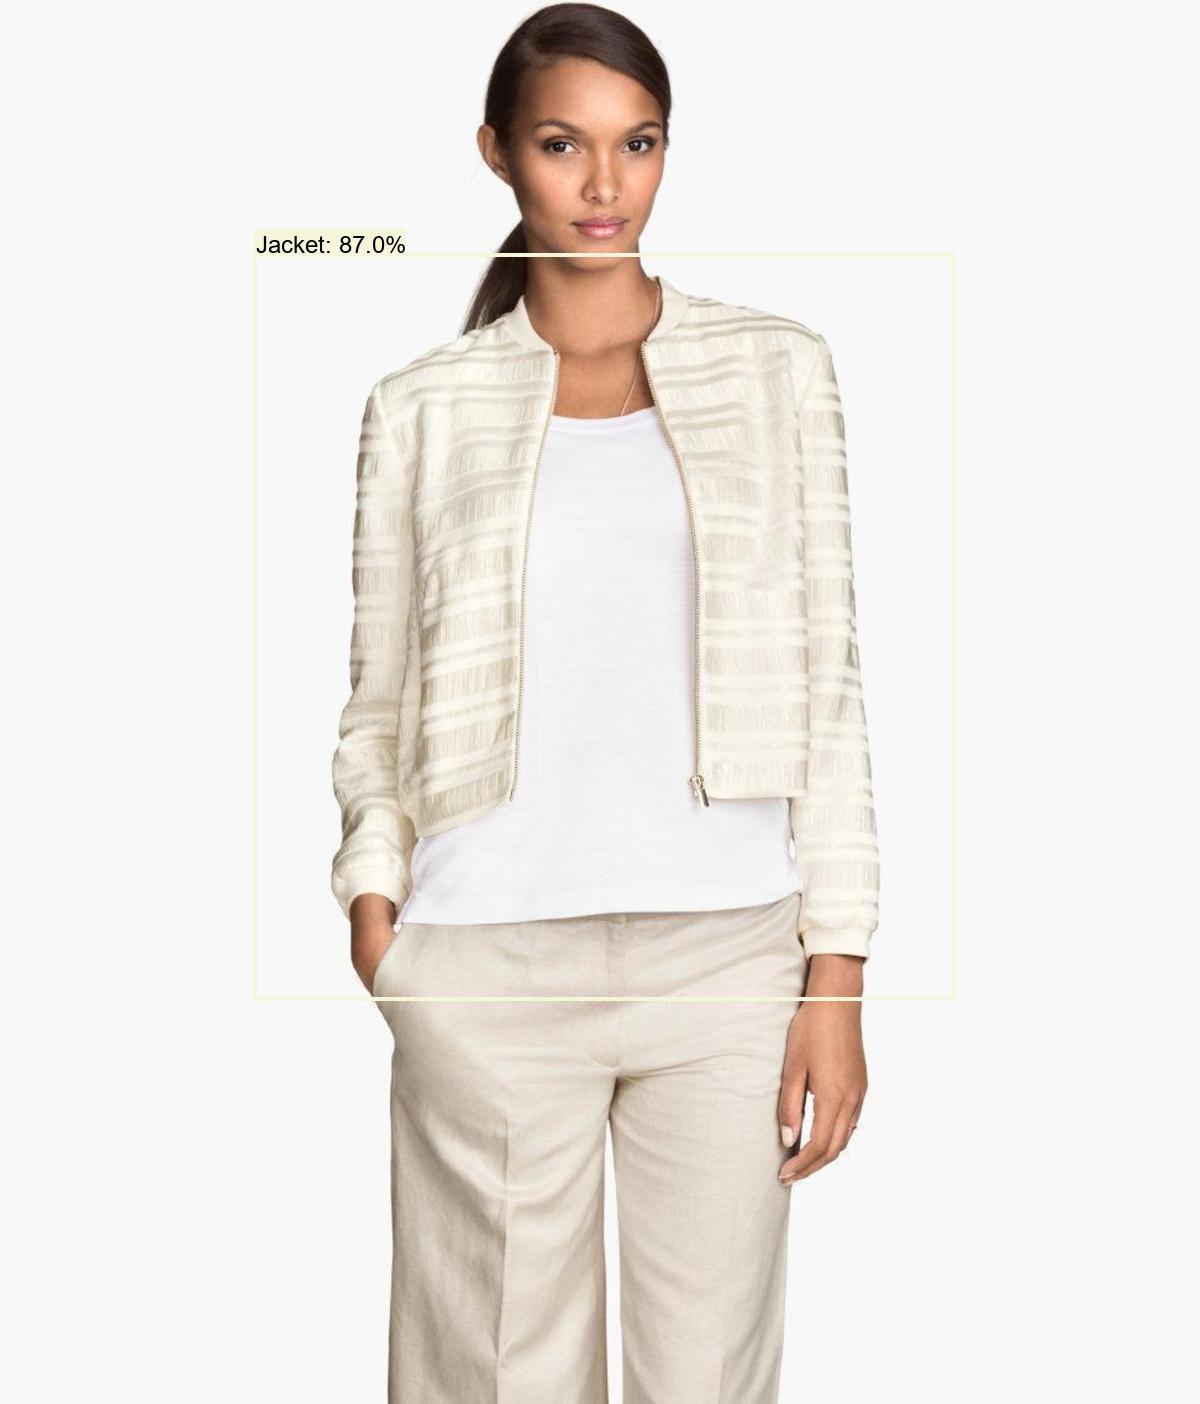

In [40]:
d = res.iloc[10]
test_image_o = cv2.imread('../'+d[0])
test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
image_with_detections = test_image_rgb.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_with_detections,
            np.array([d[['xmin','ymin','xmax','ymax']].values]),
            [d['class']],
            [d['score']],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.5,
            agnostic_mode=False)
Image.fromarray(image_with_detections)

In [41]:
cat_index = dict()
for i,d in category_index.items():
    cat_index[d['id']] = d['name']
cat_index[0]='NA'
cat_index;

- adding required details

In [42]:
result_data = res.merge(df[['filename','width','height']],on='filename',how='left')
result_data['x1'] = result_data['xmin']*result_data['width']
result_data['x2'] = result_data['xmax']*result_data['width']
result_data['y1'] = result_data['ymin']*result_data['height']
result_data['y2'] = result_data['ymax']*result_data['height']
result_data[['x1','x2','y1','y2']] = result_data[['x1','x2','y1','y2']].astype(int)
result_data['classname'] = result_data['class'].map(cat_index)
result_data

filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.260381  0.237529   
1               img/Button-Front_Blazer/img_00000093.jpg  0.247602  0.231210   
2        img/Open-Front_Zippered_Blazer/img_00000068.jpg  0.277298  0.282781   
3      img/Faux_Snakeskin-Trimmed_Blazer/img_00000051...  0.288686  0.226535   
4      img/Classic_Single-Button_Blazer/img_00000001.jpg  0.149226  0.378174   
...                                                  ...       ...       ...   
28707  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.227481  0.262105   
28708        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.202155  0.127887   
28709        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.188904  0.136474   
28710        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.184951  0.136812   
28711        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  width  height   x1    x2  \
0      0.866639  0.791125  0.941986      5       1   1460    1460  380  1265   
1      0.853300  0.763998  0.951809      1       1   1460    1460  361  1245   
2      0.905679  0.757544  0.821076      5       1   1460    1460  404  1322   
3      0.804698  0.776780  0.911755      5       1   1460    1460  421  1174   
4      0.505773  0.648620  0.912519      1       1   1438    1438  214   727   
...         ...       ...       ...    ...     ...    ...     ...  ...   ...   
28707  0.809924  0.709248  0.950856     11       1    300     400   68   242   
28708  0.915820  0.916768  0.625821      2       1    300     400   60   274   
28709  0.910733  0.902868  0.529470      3       1    300     400   56   273   
28710  0.918102  0.893778  0.545615      5       1    300     400   55   275   
28711  0.897782  0.908442  0.969952     13       1    300     400   60   269   

        y1    y2 classname  
0      346  1155    Jacket  
1      337  1115    Blazer  
2      412  1106    Jacket  
3      330  1134    Jacket  
4      543   932    Blazer  
...    ...   ...       ...  
28707  104   283      Tank  
28708   51   366    Blouse  
28709   54   361  Cardigan  
28710   54   357    Jacket  
28711   52   363       Top  

[28712 rows x 15 columns]

 - creating the text files of predictions

In [43]:
# base_directory = "../annotations/ensemble_outputs/28-2-22_ensemble_012_multi/detections/"
base_directory = "../annotations/ensemble_outputs/new_ensemble/"
model_dir = "incep_101-640_101-1024_152-800_0.5"
det_dir = base_directory+model_dir+"/detections/" 
if not os.path.exists(det_dir):
    os.makedirs(det_dir)
for i,d in tqdm(result_data.iterrows()):
    text_path = str(df[df.filename==d.filename].index[0])+'.txt'
    with open(det_dir+text_path, "a+") as text_file:
        # check status
        if d.status==1:
            data_line = str(d['classname'])+" "+str(round(d['score'],5))+" "+str(d['x1'])+" "+str(d['y1'])+" "+str(d['x2'])+" "+str(d['y2'])
            text_file.seek(0)
            exist_data = text_file.read(100)
            if len(exist_data) > 0 :
                text_file.write("\n")
            text_file.write(data_line)

28712it [01:29, 321.33it/s]


- Evaluation helper functions

copy the detections

In [4]:
# base_directory = "../annotations/ensemble_outputs/"
# model_dir = "ssd_resnet152_v1_fpn_640x640_Single"
# det_dir = base_directory+model_dir+"/detections/" 

base_directory = "../annotations/ensemble_outputs/new_ensemble/"
model_dir = "incep_101-640_101-1024_152-800_0.5"
det_dir = base_directory+model_dir+"/detections/" 

target_dir = "utils/mAP-master/input/detection-results"

if os.path.isdir(target_dir):
    shutil.rmtree(target_dir)
# os.mkdir(target_dir)

shutil.copytree(det_dir, target_dir)

'utils/mAP-master/input/detection-results'

In [13]:
# run in cmd
# python main.py

Traceback (most recent call last):
  File "utils/mAP-master/main.py", line 503, in <module>
FileNotFoundError: [Errno 2] No such file or directory: 'output/output.txt'


copy back the results


In [5]:
src_d = "utils/mAP-master/output"
target_dir = base_directory+model_dir+"/results"
shutil.copytree(src_d, target_dir)

'../annotations/ensemble_outputs/new_ensemble/incep_101-640_101-1024_152-800_0.5/results'

## SNMS

In [14]:
imp.reload(OD_Assemble)
combine = OD_Assemble.NCombiner(indexes=[1,2,3,5],con_thresh=0.6,iou_thresh=0.55)

In [19]:
inference = combine.Snms(location=0,visualize=0)
# Image.fromarray(inference)
inference

('img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg',
 [array([0.2672834 , 0.23721734, 0.8605254 , 0.79835004], dtype=float32),
  array([0.26107877, 0.24200332, 0.85669166, 0.79199344], dtype=float32),
  array([0.27318335, 0.23446564, 0.8676615 , 0.78628576], dtype=float32)],
 [0.0422338894416896, 0.05353150569627019, 0.941986],
 [5, 5, 5])

In [46]:
def calculations3():
    results = list()
    for i in tqdm(range(df.shape[0])):
        fname,bboxes,scores,classes = combine.Snms(location=i,visualize=0)
        if scores:
            for j in range(len(scores)):
                results.append([fname,*bboxes[j],scores[j],classes[j],1])
        else:
            results.append([fname,*[0]*6,0])
    return pd.pandas.DataFrame(results,columns=['filename','xmin','ymin','xmax','ymax','score','class','status'])

In [16]:
MODEL_LIST

['centernet_resnet101_v1_512x512_BBOX.pkl',
 'faster_rcnn_inception_resnet_v2_640x640_BBOX.pkl',
 'faster_rcnn_resnet101_v1_1024x1024_BBOX.pkl',
 'faster_rcnn_resnet101_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_800x1333_BBOX.pkl',
 'faster_rcnn_resnet50_v1_640x640_BBOX.pkl',
 'ssd_resnet152_v1_fpn_640x640.pkl']

In [47]:
imp.reload(OD_Assemble)
combine = OD_Assemble.NCombiner(indexes=[1,2,3,5],con_thresh=0.6,iou_thresh=0.55)
res = calculations3()
res

100%|██████████| 15600/15600 [07:18<00:00, 35.54it/s]


filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.254466  0.234507   
1      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.259844  0.242291   
2      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.251651  0.239757   
3      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.273183  0.234466   
4               img/Button-Front_Blazer/img_00000093.jpg  0.256434  0.231539   
...                                                  ...       ...       ...   
57203  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230353  0.255678   
57204  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230965  0.252216   
57205        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.201303  0.131159   
57206        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.186256  0.124747   
57207        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  
0      0.866967  0.801863  0.054703      5       1  
1      0.869567  0.787502  0.036860      5       1  
2      0.861115  0.787789  0.046050      5       1  
3      0.867661  0.786286  0.941986      5       1  
4      0.846732  0.764195  0.076839      1       1  
...         ...       ...       ...    ...     ...  
57203  0.811786  0.705984  0.030710     11       1  
57204  0.805031  0.712694  0.950856     11       1  
57205  0.916748  0.920781  0.022575      2       1  
57206  0.917664  0.914686  0.625821      2       1  
57207  0.897782  0.908442  0.969952     13       1  

[57208 rows x 8 columns]

In [48]:
res.status.value_counts()

1    56914
0      294
Name: status, dtype: int64

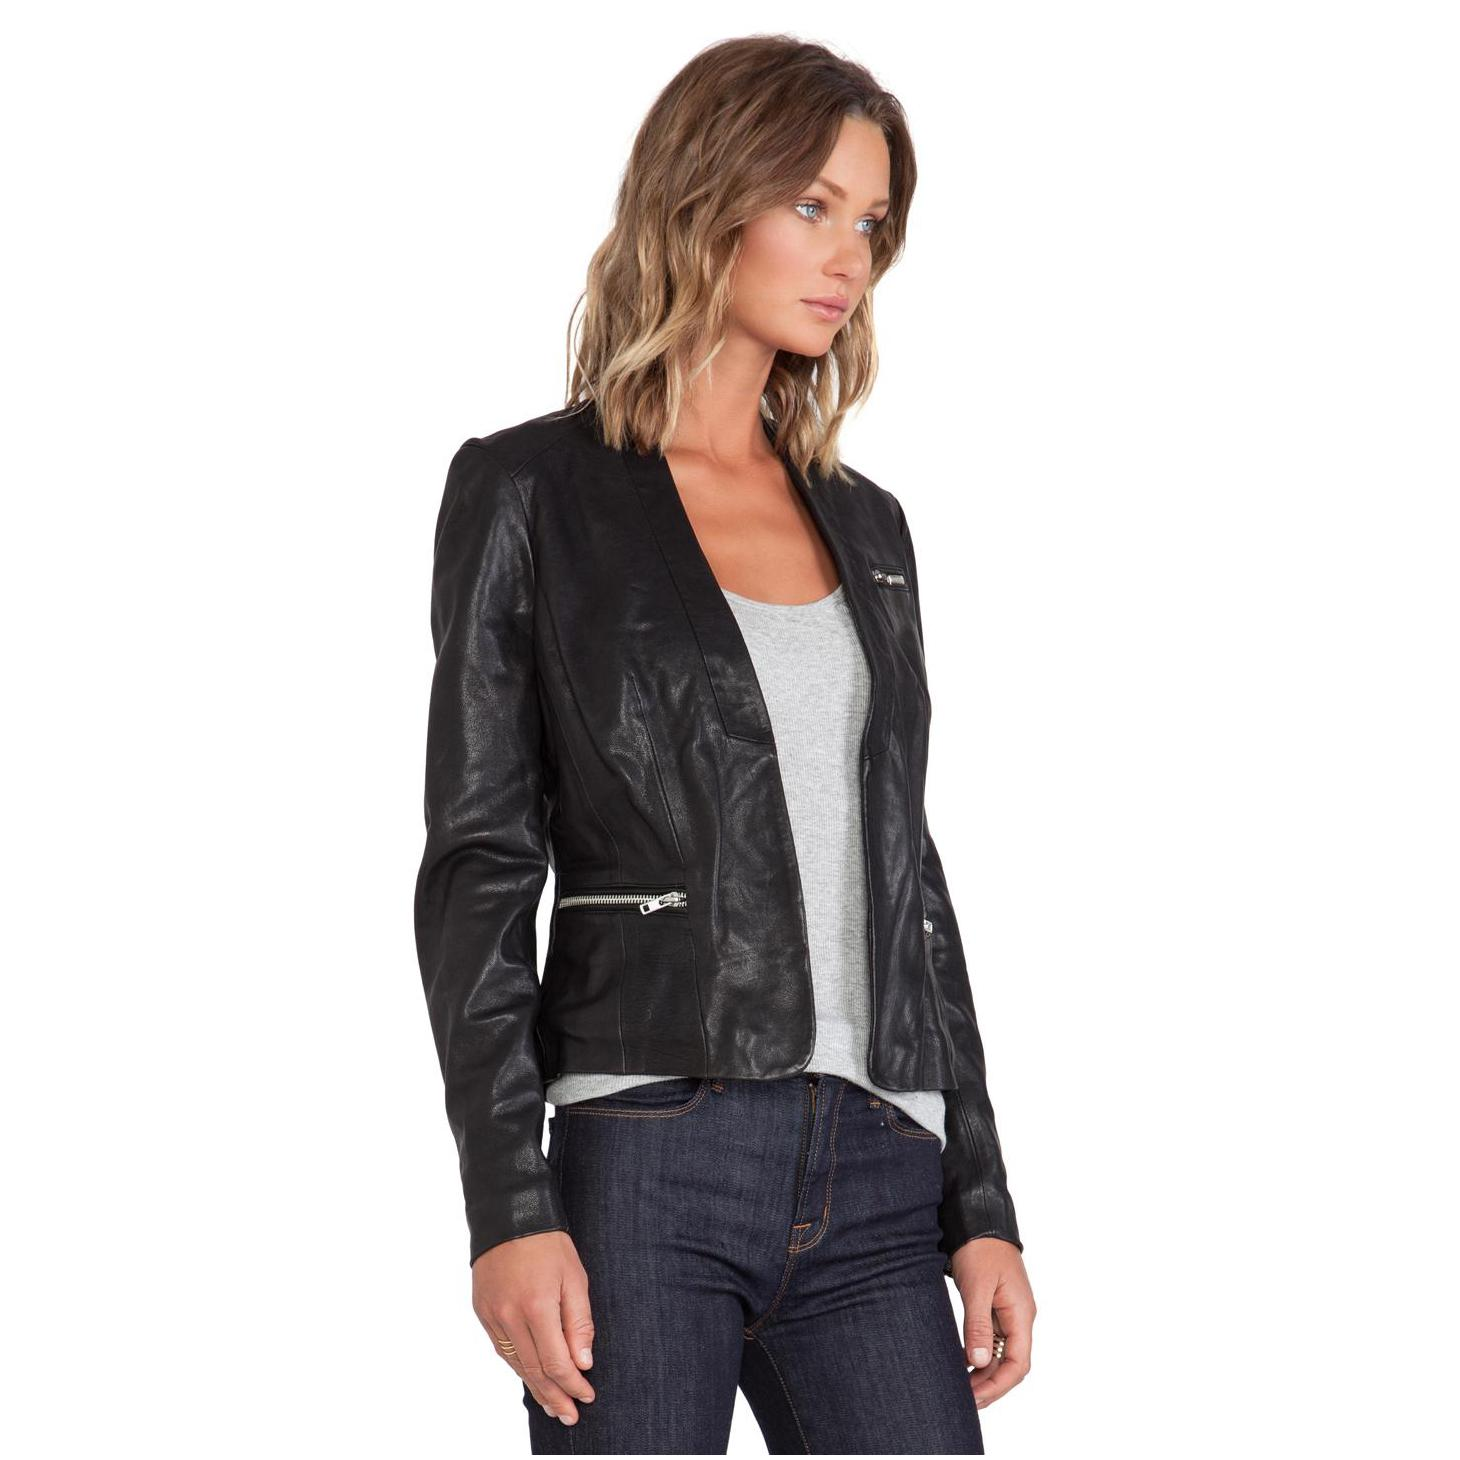

In [49]:
d = res.iloc[8]
test_image_o = cv2.imread('../'+d[0])
test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
image_with_detections = test_image_rgb.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_with_detections,
            np.array([d[['xmin','ymin','xmax','ymax']].values]),
            [d['class']],
            [d['score']],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.5,
            agnostic_mode=False)
Image.fromarray(image_with_detections)

In [50]:
cat_index = dict()
for i,d in category_index.items():
    cat_index[d['id']] = d['name']
cat_index[0]='NA'
cat_index;

In [51]:
result_data = res.merge(df[['filename','width','height']],on='filename',how='left')
result_data['x1'] = result_data['xmin']*result_data['width']
result_data['x2'] = result_data['xmax']*result_data['width']
result_data['y1'] = result_data['ymin']*result_data['height']
result_data['y2'] = result_data['ymax']*result_data['height']
result_data[['x1','x2','y1','y2']] = result_data[['x1','x2','y1','y2']].astype(int)
result_data['classname'] = result_data['class'].map(cat_index)
result_data

filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.254466  0.234507   
1      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.259844  0.242291   
2      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.251651  0.239757   
3      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.273183  0.234466   
4               img/Button-Front_Blazer/img_00000093.jpg  0.256434  0.231539   
...                                                  ...       ...       ...   
57203  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230353  0.255678   
57204  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230965  0.252216   
57205        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.201303  0.131159   
57206        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.186256  0.124747   
57207        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  width  height   x1    x2  \
0      0.866967  0.801863  0.054703      5       1   1460    1460  371  1265   
1      0.869567  0.787502  0.036860      5       1   1460    1460  379  1269   
2      0.861115  0.787789  0.046050      5       1   1460    1460  367  1257   
3      0.867661  0.786286  0.941986      5       1   1460    1460  398  1266   
4      0.846732  0.764195  0.076839      1       1   1460    1460  374  1236   
...         ...       ...       ...    ...     ...    ...     ...  ...   ...   
57203  0.811786  0.705984  0.030710     11       1    300     400   69   243   
57204  0.805031  0.712694  0.950856     11       1    300     400   69   241   
57205  0.916748  0.920781  0.022575      2       1    300     400   60   275   
57206  0.917664  0.914686  0.625821      2       1    300     400   55   275   
57207  0.897782  0.908442  0.969952     13       1    300     400   60   269   

        y1    y2 classname  
0      342  1170    Jacket  
1      353  1149    Jacket  
2      350  1150    Jacket  
3      342  1147    Jacket  
4      338  1115    Blazer  
...    ...   ...       ...  
57203  102   282      Tank  
57204  100   285      Tank  
57205   52   368    Blouse  
57206   49   365    Blouse  
57207   52   363       Top  

[57208 rows x 15 columns]

In [52]:
# base_directory = "../annotations/ensemble_outputs/28-2-22_ensemble_012_multi/detections/"
base_directory = "../annotations/ensemble_outputs/new_ensemble/"
model_dir = "incep_101-640_101-1024_152-800_0.5_SNMS"
det_dir = base_directory+model_dir+"/detections/"
if not os.path.exists(det_dir):
    os.makedirs(det_dir)
for i,d in tqdm(result_data.iterrows()):
    text_path = str(df[df.filename==d.filename].index[0])+'.txt'
    with open(det_dir+text_path, "a+") as text_file:
        # check status
        if d.status==1:
            data_line = str(d['classname'])+" "+str(round(d['score'],5))+" "+str(d['x1'])+" "+str(d['y1'])+" "+str(d['x2'])+" "+str(d['y2'])
            text_file.seek(0)
            exist_data = text_file.read(100)
            if len(exist_data) > 0 :
                text_file.write("\n")
            text_file.write(data_line)

57208it [03:52, 246.47it/s]


In [53]:
# base_directory = "../annotations/ensemble_outputs/"
# model_dir = "faster_rcnn_inception_resnet_v2_640x640_Single"
# det_dir = base_directory+model_dir+"/detections/" 

target_dir = "utils/mAP-master/input/detection-results"

if os.path.isdir(target_dir):
    shutil.rmtree(target_dir)
# os.mkdir(target_dir)

shutil.copytree(det_dir, target_dir)

'utils/mAP-master/input/detection-results'

In [ ]:
# run in cmd
# python main.py

In [54]:
src_d = "utils/mAP-master/output"
target_dir = base_directory+model_dir+"/results"
shutil.copytree(src_d, target_dir)

'../annotations/ensemble_outputs/new_ensemble/incep_101-640_101-1024_152-800_0.5_SNMS/results'

## NMS

In [3]:
imp.reload(OD_Assemble)
combine = OD_Assemble.NCombiner(indexes=[1,2,3,5],con_thresh=0.5,iou_thresh=0.55)

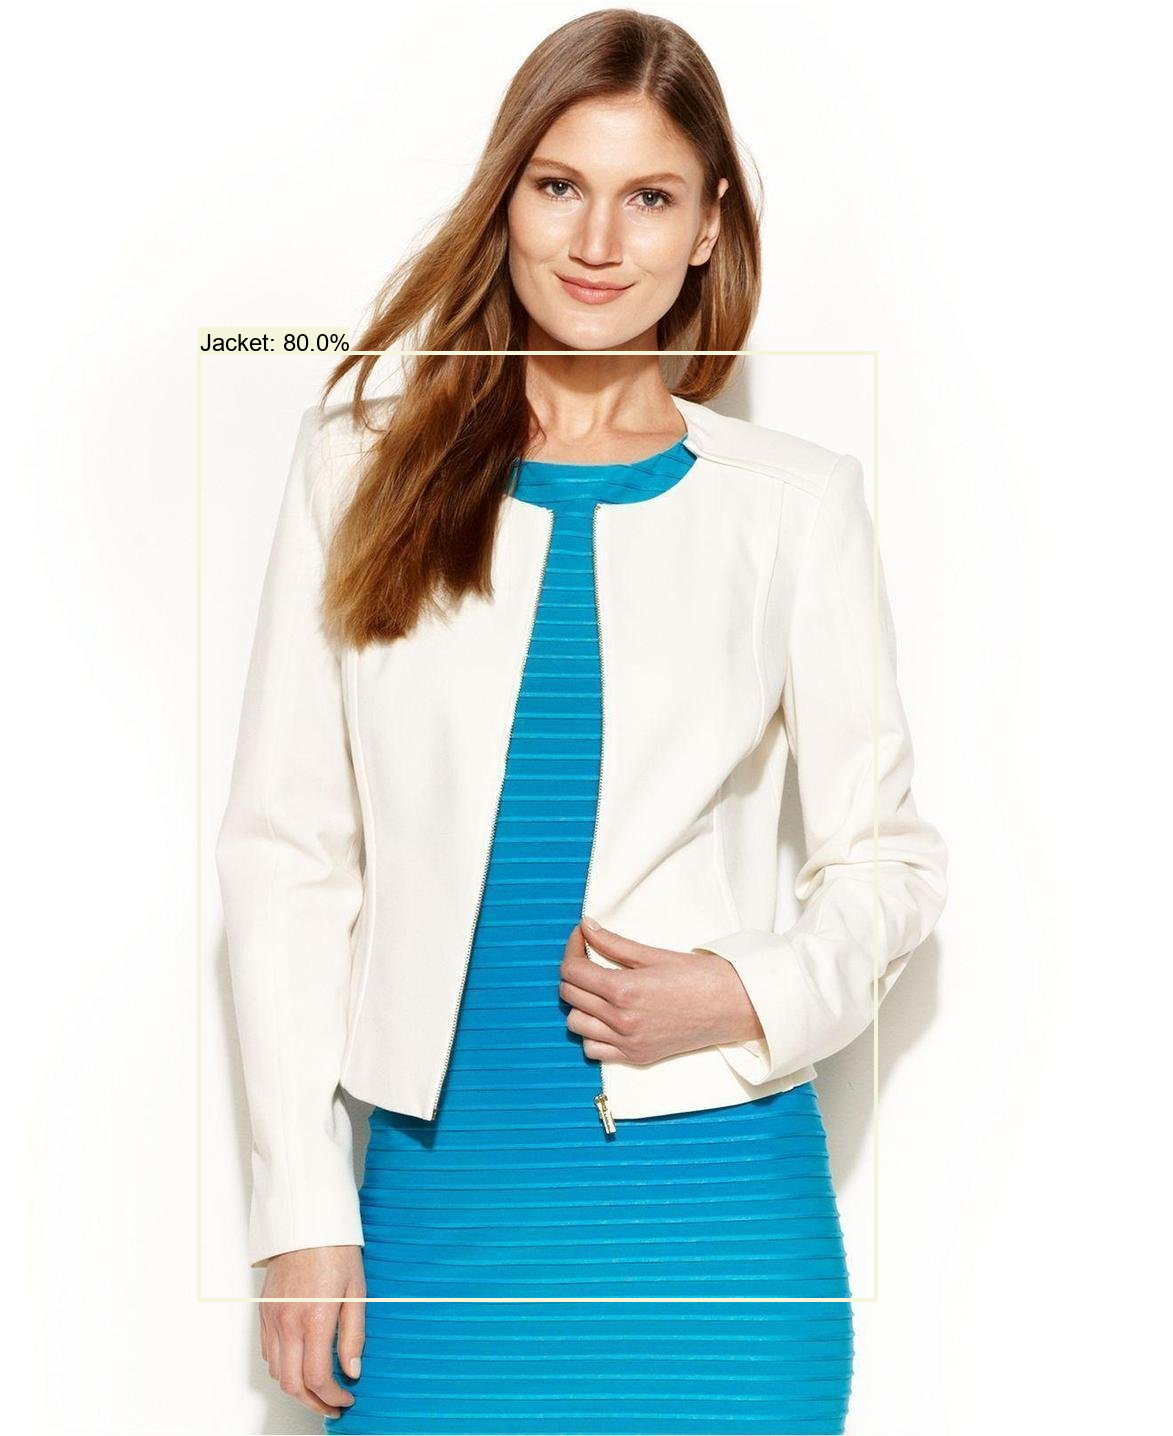

In [46]:
inference = combine.Nms(location=10,visualize=1)
Image.fromarray(inference)
# inference

In [56]:
def calculations4():
    results = list()
    for i in tqdm(range(df.shape[0])):
        fname,bboxes,scores,classes = combine.Nms(location=i,visualize=0)
        if scores:
            for j in range(len(scores)):
                results.append([fname,*bboxes[j],scores[j],classes[j],1])
        else:
            results.append([fname,*[0]*6,0])
    return pd.pandas.DataFrame(results,columns=['filename','xmin','ymin','xmax','ymax','score','class','status'])

In [57]:
MODEL_LIST

['centernet_resnet101_v1_512x512_BBOX.pkl',
 'faster_rcnn_inception_resnet_v2_640x640_BBOX.pkl',
 'faster_rcnn_resnet101_v1_1024x1024_BBOX.pkl',
 'faster_rcnn_resnet101_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_640x640_BBOX.pkl',
 'faster_rcnn_resnet152_v1_800x1333_BBOX.pkl',
 'faster_rcnn_resnet50_v1_640x640_BBOX.pkl',
 'ssd_resnet152_v1_fpn_640x640.pkl']

In [58]:
# imp.reload(OD_Assemble)
# combine = OD_Assemble.NCombiner(indexes=[3,4,5],con_thresh=0.6,iou_thresh=0.55)
res = calculations4()
res

100%|██████████| 15600/15600 [06:30<00:00, 39.98it/s]


filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.273183  0.234466   
1               img/Button-Front_Blazer/img_00000093.jpg  0.226730  0.228724   
2        img/Open-Front_Zippered_Blazer/img_00000068.jpg  0.280944  0.276933   
3      img/Faux_Snakeskin-Trimmed_Blazer/img_00000051...  0.289079  0.216895   
4      img/Classic_Single-Button_Blazer/img_00000001.jpg  0.139423  0.381895   
...                                                  ...       ...       ...   
23932         img/Abstract_Buttoned_Top/img_00000029.jpg  0.064900  0.000000   
23933  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.194635  0.196127   
23934  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230965  0.252216   
23935        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.186256  0.124747   
23936        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  
0      0.867661  0.786286  0.941986      5       1  
1      0.863720  0.765770  0.951809      1       1  
2      0.904209  0.758149  0.821076      5       1  
3      0.800696  0.778262  0.911755      5       1  
4      0.507973  0.645049  0.912519      1       1  
...         ...       ...       ...    ...     ...  
23932  1.000000  1.000000  0.828802     13       1  
23933  0.837029  0.794844  0.699356      7       1  
23934  0.805031  0.712694  0.950856     11       1  
23935  0.917664  0.914686  0.625821      2       1  
23936  0.897782  0.908442  0.969952     13       1  

[23937 rows x 8 columns]

In [59]:
res.status.value_counts()

1    23643
0      294
Name: status, dtype: int64

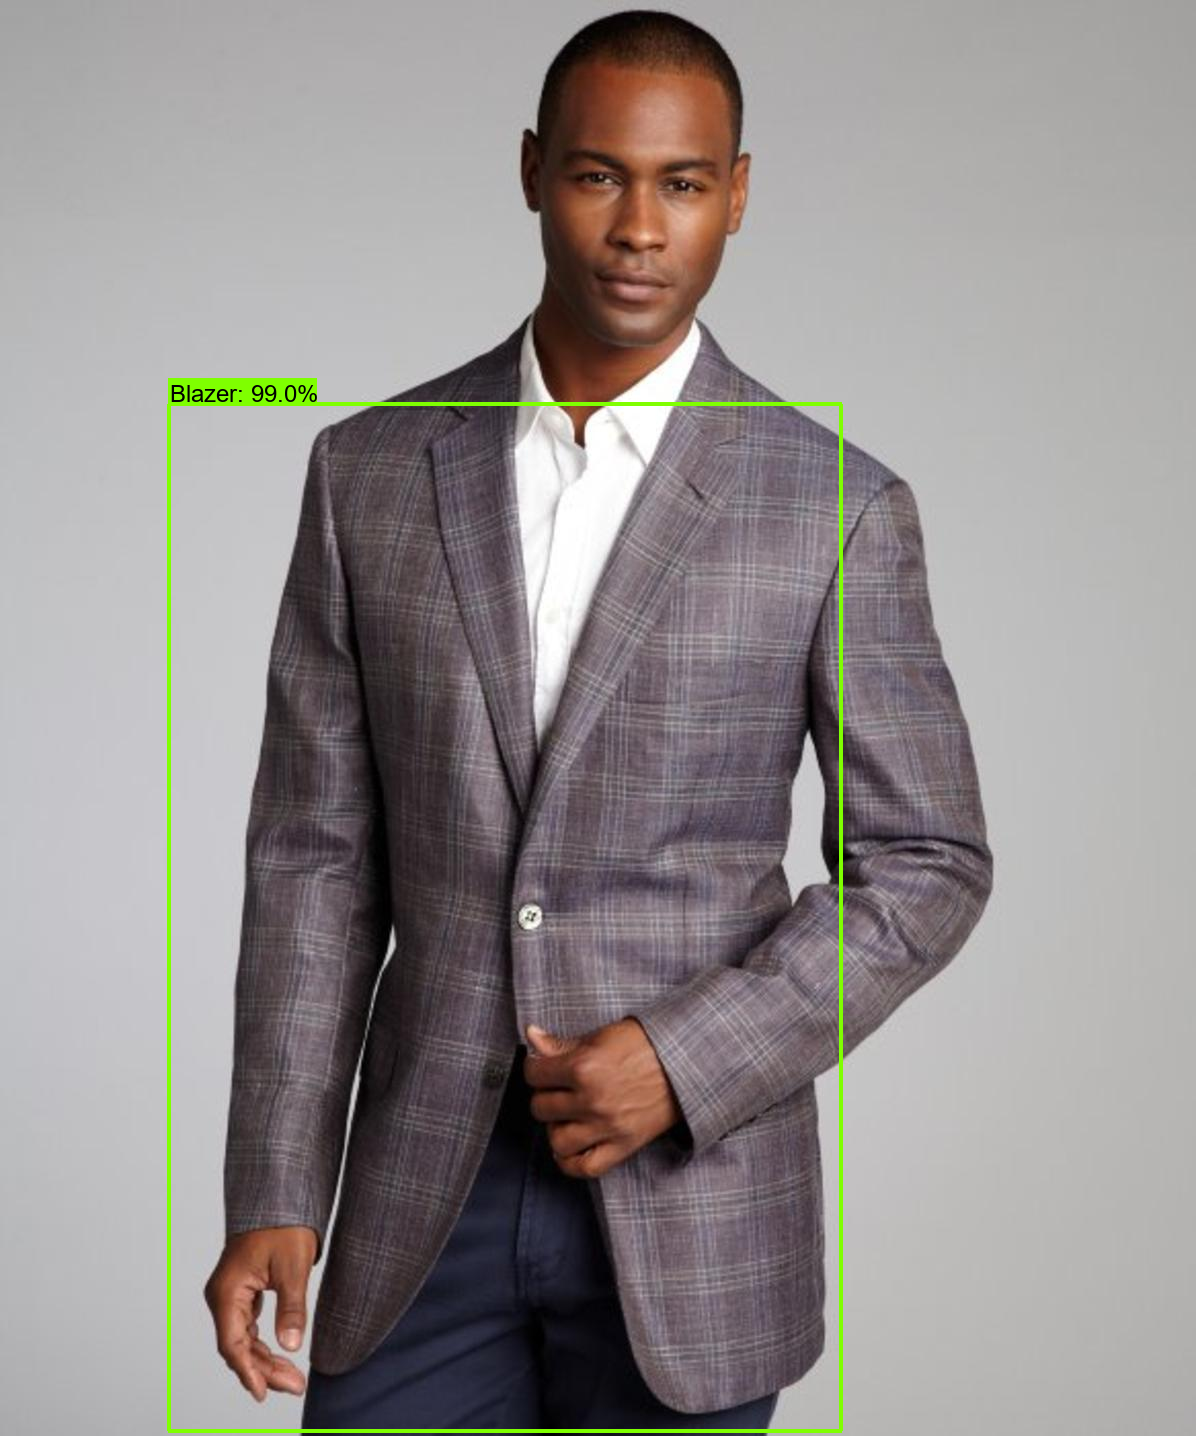

In [60]:
d = res.iloc[8]
test_image_o = cv2.imread('../'+d[0])
test_image_rgb = cv2.cvtColor(test_image_o, cv2.COLOR_BGR2RGB)
image_with_detections = test_image_rgb.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
            image_with_detections,
            np.array([d[['xmin','ymin','xmax','ymax']].values]),
            [d['class']],
            [d['score']],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=0.5,
            agnostic_mode=False)
Image.fromarray(image_with_detections)

In [61]:
cat_index = dict()
for i,d in category_index.items():
    cat_index[d['id']] = d['name']
cat_index[0]='NA'
cat_index;

In [62]:
result_data = res.merge(df[['filename','width','height']],on='filename',how='left')
result_data['x1'] = result_data['xmin']*result_data['width']
result_data['x2'] = result_data['xmax']*result_data['width']
result_data['y1'] = result_data['ymin']*result_data['height']
result_data['y2'] = result_data['ymax']*result_data['height']
result_data[['x1','x2','y1','y2']] = result_data[['x1','x2','y1','y2']].astype(int)
result_data['classname'] = result_data['class'].map(cat_index)
result_data

filename      xmin      ymin  \
0      img/Zippered_Shawl_Collar_Blazer/img_00000136.jpg  0.273183  0.234466   
1               img/Button-Front_Blazer/img_00000093.jpg  0.226730  0.228724   
2        img/Open-Front_Zippered_Blazer/img_00000068.jpg  0.280944  0.276933   
3      img/Faux_Snakeskin-Trimmed_Blazer/img_00000051...  0.289079  0.216895   
4      img/Classic_Single-Button_Blazer/img_00000001.jpg  0.139423  0.381895   
...                                                  ...       ...       ...   
23932         img/Abstract_Buttoned_Top/img_00000029.jpg  0.064900  0.000000   
23933  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.194635  0.196127   
23934  img/Abstract_Tile_Ladder-Back_Top/img_00000037...  0.230965  0.252216   
23935        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.186256  0.124747   
23936        img/Asymmetric_Batwing_Top/img_00000044.jpg  0.200206  0.130221   

           xmax      ymax     score  class  status  width  height   x1    x2  \
0      0.867661  0.786286  0.941986      5       1   1460    1460  398  1266   
1      0.863720  0.765770  0.951809      1       1   1460    1460  331  1261   
2      0.904209  0.758149  0.821076      5       1   1460    1460  410  1320   
3      0.800696  0.778262  0.911755      5       1   1460    1460  422  1169   
4      0.507973  0.645049  0.912519      1       1   1438    1438  200   730   
...         ...       ...       ...    ...     ...    ...     ...  ...   ...   
23932  1.000000  1.000000  0.828802     13       1    300     400   19   300   
23933  0.837029  0.794844  0.699356      7       1    300     400   58   251   
23934  0.805031  0.712694  0.950856     11       1    300     400   69   241   
23935  0.917664  0.914686  0.625821      2       1    300     400   55   275   
23936  0.897782  0.908442  0.969952     13       1    300     400   60   269   

        y1    y2 classname  
0      342  1147    Jacket  
1      333  1118    Blazer  
2      404  1106    Jacket  
3      316  1136    Jacket  
4      549   927    Blazer  
...    ...   ...       ...  
23932    0   400       Top  
23933   78   317    Romper  
23934  100   285      Tank  
23935   49   365    Blouse  
23936   52   363       Top  

[23937 rows x 15 columns]

In [63]:
# base_directory = "../annotations/ensemble_outputs/28-2-22_ensemble_012_multi/detections/"
base_directory = "../annotations/ensemble_outputs/new_ensemble/"
model_dir = "incep_101-640_101-1024_152-800_0.5_NMS"
det_dir = base_directory+model_dir+"/detections/" 
if not os.path.exists(det_dir):
    os.makedirs(det_dir)
for i,d in tqdm(result_data.iterrows()):
    text_path = str(df[df.filename==d.filename].index[0])+'.txt'
    with open(det_dir+text_path, "a+") as text_file:
        # check status
        if d.status==1:
            data_line = str(d['classname'])+" "+str(round(d['score'],5))+" "+str(d['x1'])+" "+str(d['y1'])+" "+str(d['x2'])+" "+str(d['y2'])
            text_file.seek(0)
            exist_data = text_file.read(100)
            if len(exist_data) > 0 :
                text_file.write("\n")
            text_file.write(data_line)

23937it [01:05, 365.72it/s]


In [4]:
# base_directory = "../annotations/ensemble_outputs/"
# model_dir = "faster_rcnn_inception_resnet_v2_640x640_Single"
# det_dir = base_directory+model_dir+"/detections/" 

target_dir = "utils/mAP-master/input/detection-results"

base_directory = "../annotations/ensemble_outputs/new_ensemble/"
model_dir = "incep_101-640_101-1024_152-800_0.5_NMS"
det_dir = base_directory+model_dir+"/detections/" 


if os.path.isdir(target_dir):
    shutil.rmtree(target_dir)
# os.mkdir(target_dir)

shutil.copytree(det_dir, target_dir)

'utils/mAP-master/input/detection-results'

In [ ]:
# run in cmd
# python main.py

In [5]:
src_d = "utils/mAP-master/output"
target_dir = base_directory+model_dir+"/results"
shutil.copytree(src_d, target_dir)

'../annotations/ensemble_outputs/new_ensemble/incep_101-640_101-1024_152-800_0.5_NMS/results'